### Étape 1: Analyse des données avec Pandas et NumpyÉtape 1: Analyse des données avec Pandas et Numpy

In [10]:
import numpy as np
import pandas as pd

# Chargement des données
df = pd.read_csv('suites.csv')

# Surface : Moyenne, écart-type, surface minimale et maximale
surface_mean = df['surface'].mean()
surface_std = df['surface'].std()
surface_min = df['surface'].min()
surface_max = df['surface'].max()

# Année : Moyenne, construction la plus ancienne, la plus récente
annee_mean = df['annee'].mean()
oldest_construction = df['annee'].min()
newest_construction = df['annee'].max()

# Proportion d'appartements avec balcon
balcon_proportion = df['balcon'].mean()

# Comptage des catégories de prix
price_category_counts = df['price_category'].value_counts()

# Nombre de chambres : Moyenne, médiane, variance, écart-type
nb_rooms_mean = df['nbRooms'].mean()
nb_rooms_median = df['nbRooms'].median()
nb_rooms_variance = df['nbRooms'].var()
nb_rooms_std = df['nbRooms'].std()

# Affichage des résultats
print(f"Surface: Moyenne={surface_mean}, Ecart-type={surface_std}, Min={surface_min}, Max={surface_max}")
print(f"Année: Moyenne={annee_mean}, Plus ancienne={oldest_construction}, Plus récente={newest_construction}")
print(f"Proportion d'appartements avec balcon: {balcon_proportion}")
print(f"Catégories de prix: \n{price_category_counts}")
print(f"Nombre de chambres: Moyenne={nb_rooms_mean}, Médiane={nb_rooms_median}, Variance={nb_rooms_variance}, Ecart-type={nb_rooms_std}")


Surface: Moyenne=86.4, Ecart-type=30.56828835843703, Min=45, Max=150
Année: Moyenne=2013.5125, Plus ancienne=2005, Plus récente=2024
Proportion d'appartements avec balcon: 0.475
Catégories de prix: 
price_category
low       30
high      29
normal    21
Name: count, dtype: int64
Nombre de chambres: Moyenne=3.8875, Médiane=4.0, Variance=1.5947784810126582, Ecart-type=1.2628453907793535


### Étape 2: Visualisation avec Matplotlib
#### Diagramme à barres pour les catégories de prix

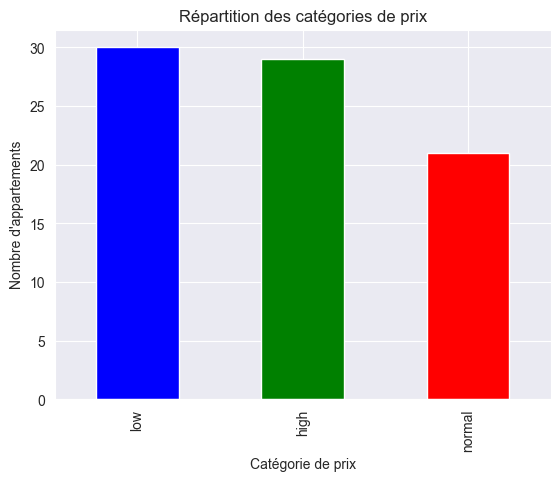

In [11]:
import matplotlib.pyplot as plt

price_category_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title('Répartition des catégories de prix')
plt.xlabel('Catégorie de prix')
plt.ylabel('Nombre d\'appartements')
plt.show()


### Heatmap de la corrélation entre l'année et le prix

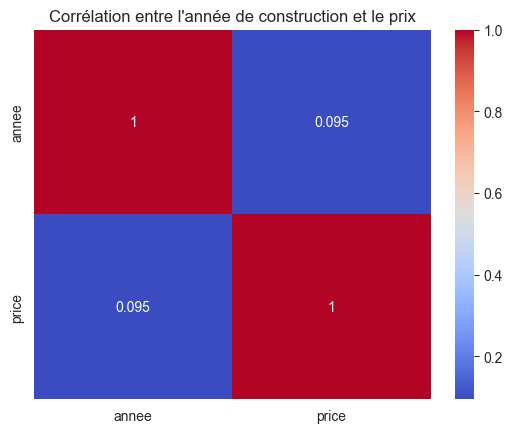

In [12]:
import seaborn as sns

correlation = df[['annee', 'price']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Corrélation entre l\'année de construction et le prix')
plt.show()


### Étape 4: Régression linéaire pour prédire la note

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Préparation des données
X = df[['surface', 'price']]  # Variables explicatives
y = df['note']  # Variable dépendante

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédictions
y_pred = linear_model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R²: {r2}")

MSE: 2.513484313698955, R²: -0.025911964775083618


### Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Charger les données
df = pd.read_csv('suites.csv')

# Préparation des données
X = df[['price', 'ville']]  # Variables explicatives (prix et ville)
y = df['garage']  # Variable dépendante (garage: True/False)

# Encodage de la variable ville
label_encoder = LabelEncoder()
X['ville'] = label_encoder.fit_transform(X['ville'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Prédictions
y_pred = logistic_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6875
Recall: 0.42857142857142855
F1 Score: 0.5454545454545454


/var/folders/s2/577ycy1d1r1d3lsrqvqz8jf80000gn/T/ipykernel_60704/4044810919.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ville'] = label_encoder.fit_transform(X['ville'])


### Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Charger les données
df = pd.read_csv('suites.csv')

# Préparation des données
X = df[['price', 'ville']]  # Variables explicatives (prix et ville)
y = df['balcon']  # Variable dépendante (balcon: True/False)

# Encodage de la variable ville
label_encoder = LabelEncoder()
X['ville'] = label_encoder.fit_transform(X['ville'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_test)

# Évaluation du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Affichage des résultats
print(f"Accuracy (KNN): {accuracy_knn}")
print(f"Recall (KNN): {recall_knn}")
print(f"F1 Score (KNN): {f1_knn}")


Accuracy (KNN): 0.5
Recall (KNN): 0.5
F1 Score (KNN): 0.42857142857142855


/var/folders/s2/577ycy1d1r1d3lsrqvqz8jf80000gn/T/ipykernel_60704/2399732544.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ville'] = label_encoder.fit_transform(X['ville'])


### Bonus: Comparer les 2 méthodes de classification KNN et logistique précédente pour voir celle qui prédits le mieux: (accuracy, recall puis F1 Score)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Charger les données
df = pd.read_csv('suites.csv')

# Préparation des données
X = df[['price', 'ville']]  # Variables explicatives (prix et ville)
y_balcon = df['balcon']  # Cible 1 (balcon: True/False)
y_garage = df['garage']  # Cible 2 (garage: True/False)

# Encodage de la variable ville
label_encoder = LabelEncoder()
X['ville'] = label_encoder.fit_transform(X['ville'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train_balcon, y_test_balcon = train_test_split(X, y_balcon, test_size=0.2, random_state=42)
X_train_garage, X_test_garage, y_train_garage, y_test_garage = train_test_split(X, y_garage, test_size=0.2, random_state=42)

# 1. Classification Logistique pour le garage
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_garage, y_train_garage)
y_pred_logistic_garage = logistic_model.predict(X_test_garage)

# 2. KNN pour le balcon
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_balcon)
y_pred_knn_balcon = knn_model.predict(X_test)

# Évaluation du modèle logistique (garage)
accuracy_logistic = accuracy_score(y_test_garage, y_pred_logistic_garage)
recall_logistic = recall_score(y_test_garage, y_pred_logistic_garage)
f1_logistic = f1_score(y_test_garage, y_pred_logistic_garage)

# Évaluation du modèle KNN (balcon)
accuracy_knn = accuracy_score(y_test_balcon, y_pred_knn_balcon)
recall_knn = recall_score(y_test_balcon, y_pred_knn_balcon)
f1_knn = f1_score(y_test_balcon, y_pred_knn_balcon)

# Affichage des résultats de la comparaison
print("Logistic Regression (Garage):")
print(f"  Accuracy: {accuracy_logistic}")
print(f"  Recall: {recall_logistic}")
print(f"  F1 Score: {f1_logistic}")

print("\nKNN (Balcon):")
print(f"  Accuracy: {accuracy_knn}")
print(f"  Recall: {recall_knn}")
print(f"  F1 Score: {f1_knn}")


Logistic Regression (Garage):
  Accuracy: 0.6875
  Recall: 0.42857142857142855
  F1 Score: 0.5454545454545454

KNN (Balcon):
  Accuracy: 0.5
  Recall: 0.5
  F1 Score: 0.42857142857142855


/var/folders/s2/577ycy1d1r1d3lsrqvqz8jf80000gn/T/ipykernel_60704/254072094.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ville'] = label_encoder.fit_transform(X['ville'])


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Charger les données
df = pd.read_csv('suites.csv')

# Préparation des données
X = df[['price', 'ville']]  # Variables explicatives (prix et ville)
y = df['balcon']  # Variable dépendante (balcon: True/False)

# Encodage de la variable ville
label_encoder = LabelEncoder()
X['ville'] = label_encoder.fit_transform(X['ville'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = random_forest_model.predict(X_test)

# Évaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Affichage des résultats
print("Random Forest (Balcon):")
print(f"  Accuracy: {accuracy_rf}")
print(f"  Recall: {recall_rf}")
print(f"  F1 Score: {f1_rf}")


/var/folders/s2/577ycy1d1r1d3lsrqvqz8jf80000gn/T/ipykernel_60704/2485100890.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ville'] = label_encoder.fit_transform(X['ville'])


Random Forest (Balcon):
  Accuracy: 0.5625
  Recall: 0.8333333333333334
  F1 Score: 0.5882352941176471
